In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

Data with knowledge

In [3]:
data = pd.read_csv('../data/03_Processed/02_ProcessedData.csv')
data_mapped = data.copy()
data_mapped.set_index('ID', inplace=True)

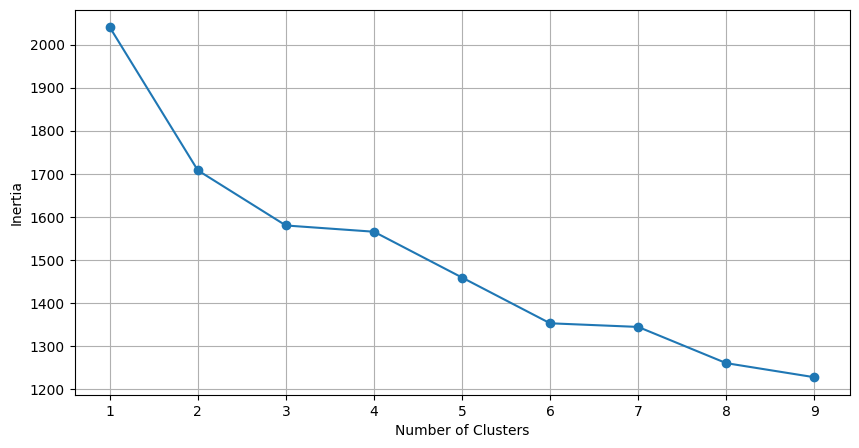

In [4]:
optimise_k_means(data_mapped, 10)

In [5]:
kmeans = KMeans(n_clusters=6,random_state=42)

In [6]:
kmeans.fit(data_mapped)

KMeans(n_clusters=6, random_state=42)

In [7]:
data_mapped['kmeans_6'] = kmeans.labels_

In [8]:
data_mapped_cluster_assignment = data_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów:")
for cluster, members in data_mapped_cluster_assignment.items():
    cluster +=1
    print(f"Klaster {cluster}: {members}")


Przypisanie obiektów do klastrów:
Klaster 1: [2, 4, 10, 24, 29, 32, 36, 44]
Klaster 2: [15, 25, 49, 50, 53]
Klaster 3: [7, 9, 14, 16, 20, 22, 27, 33, 35, 42, 43, 46, 48, 52, 54, 58, 61, 67]
Klaster 4: [3, 5, 6, 11, 12, 18, 23, 26, 37, 41, 45, 47, 55, 57, 64]
Klaster 5: [0, 17, 63]
Klaster 6: [13, 19, 21, 28, 30, 31, 34, 38, 51, 59]


/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_27738/4191156100.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_mapped_cluster_assignment = data_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()


Data without knowledge

In [9]:
datawithoutknowledge = pd.read_csv('../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv')
datawithoutknowledge_mapped = datawithoutknowledge.copy()
datawithoutknowledge_mapped.set_index('ID', inplace=True)

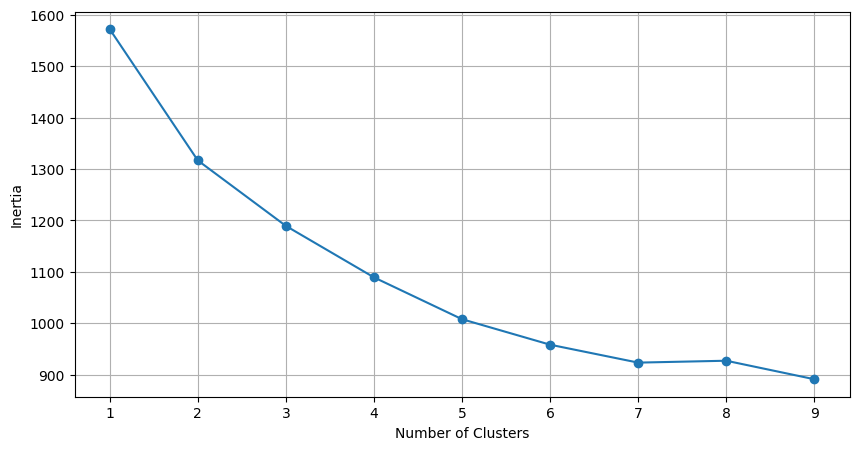

In [10]:
optimise_k_means(datawithoutknowledge_mapped, 10)

In [11]:
kmeans_without = KMeans(n_clusters=6, random_state=42)

In [12]:
kmeans.fit(datawithoutknowledge_mapped)

KMeans(n_clusters=6, random_state=42)

In [13]:
datawithoutknowledge_mapped['kmeans_6'] = kmeans.labels_

In [14]:
datawithoutknowledge_mapped_cluster_assignment = datawithoutknowledge_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów:")
for cluster, members in datawithoutknowledge_mapped_cluster_assignment.items():
    cluster +=1
    print(f"Klaster {cluster}: {members}")


Przypisanie obiektów do klastrów:
Klaster 1: [4, 5, 6, 10, 21, 24, 29, 32, 33, 45]
Klaster 2: [13, 19, 25, 28, 30, 34, 38, 49, 59]
Klaster 3: [7, 9, 14, 16, 20, 27, 35, 42, 46, 48, 50, 52, 53, 54, 58, 61, 67]
Klaster 4: [2, 3, 18, 23, 36, 44]
Klaster 5: [0, 17, 31, 51, 63]
Klaster 6: [11, 12, 15, 22, 26, 37, 41, 43, 47, 55, 57, 64]


/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_27738/3400669353.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datawithoutknowledge_mapped_cluster_assignment = datawithoutknowledge_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()
